In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
# Importamos las librerias necesarias.
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mimg

In [3]:
%matplotlib inline

In [4]:
pd.options.display.max_columns = None

In [5]:
df = pd.read_excel('EDERJAKIN_LA_Datos_2021.xlsm', sheet_name=None)

In [6]:
Usuarios = pd.read_csv('UsuariosSheet.csv')
Tutores_perfil = pd.read_csv('Tutores perfilSheet.csv')
Conocimientos = pd.read_csv('ConocimientosSheet.csv')
Cursos = pd.read_csv('CursosSheet.csv')
Programas = pd.read_csv('ProgramasSheet.csv')
Cursos_en_Programas = pd.read_csv('Cursos en ProgramasSheet.csv')
Itinearios = pd.read_csv('ItineariosSheet.csv')
Notas_Cursos = pd.read_csv('Notas_CursosSheet.csv')
Roles = pd.read_csv('RolesSheet.csv')
Plantas = pd.read_csv('PlantasSheet.csv')
Accesos = pd.read_csv('AccesosSheet.csv')
Acceso_1ero_ultimo = pd.read_csv('Acceso_1ero_ultimoSheet.csv')
Actividades = pd.read_csv('ActividadesSheet.csv')

In [7]:
#Eliminamos columna porque no sirve para nada.
Usuarios=Usuarios.drop(['Unnamed: 0'], axis=1)
Tutores_perfil=Tutores_perfil.drop(['Unnamed: 0'], axis=1)
Conocimientos=Conocimientos.drop(['Unnamed: 0'], axis=1)
Cursos=Cursos.drop(['Unnamed: 0'], axis=1)
Programas=Programas.drop(['Unnamed: 0'], axis=1)
Cursos_en_Programas=Cursos_en_Programas.drop(['Unnamed: 0'], axis=1)
Itinearios=Itinearios.drop(['Unnamed: 0'], axis=1)
Notas_Cursos=Notas_Cursos.drop(['Unnamed: 0'], axis=1)
Roles=Roles.drop(['Unnamed: 0'], axis=1)
Plantas=Plantas.drop(['Unnamed: 0'], axis=1)
Accesos=Accesos.drop(['Unnamed: 0'], axis=1)
Acceso_1ero_ultimo=Acceso_1ero_ultimo.drop(['Unnamed: 0'], axis=1)
Actividades=Actividades.drop(['Unnamed: 0'], axis=1)

In [8]:
print(Usuarios.head())

   user_id useranonimo_name  active_flag language  last_access  mdl_user_id  \
0        3      username_03            1       es          NaN         13.0   
1        4      username_04            1       es          NaN         14.0   
2        5      username_05            1       es          NaN         15.0   
3        6      username_06            1       es          NaN         17.0   
4        7      username_07            1       es          NaN         18.0   

   role_admin  role_manager  role_student  role_tutor   planta_name  
0           0             0             1           0   ABP Bergara  
1           0             0             1           0  Fagorederlan  
2           0             0             1           0  ABP Arrasate  
3           0             0             1           0  Fagorederlan  
4           0             0             1           0  ABP Arrasate  


In [9]:
print(Notas_Cursos.shape)

(3898, 8)


In [10]:
dflimpio = pd.merge(Notas_Cursos.iloc[:,[2,4,5,7]], Cursos.iloc[:,[0,2,3]], on='course_id', how='left')

In [11]:
print(dflimpio.shape)

(3898, 6)


In [12]:
dflimpio = pd.merge(dflimpio, Usuarios.iloc[:,[0,3,5,10]], on='user_id', how='left')

In [13]:
print(dflimpio.shape)

(3898, 9)


In [14]:
dflimpio = pd.merge(dflimpio, Acceso_1ero_ultimo, on='mdl_user_id', how='left')

In [15]:
print(dflimpio.shape)

(3898, 11)


In [16]:
dflimpio = pd.merge(dflimpio, Plantas, on='planta_name', how='left')

In [17]:
print(dflimpio.shape)

(3898, 12)


In [18]:
print(dflimpio.head())

   course_id  grade  online_progress  user_id  category  hours language  \
0        224   0.00              0.0      138        27      0       es   
1        224   9.32              0.0      262        27      0       es   
2        224   9.66              0.0      265        27      0       es   
3        224    NaN              NaN      263        27      0       es   
4        224    NaN              NaN      264        27      0       es   

   mdl_user_id   planta_name                               1er acceso  \
0        183.0  ABP Arrasate          lunes, 4 de mayo de 2020, 17:04   
1        296.0  ABP Arrasate  viernes, 18 de diciembre de 2020, 14:44   
2        299.0  ABP Arrasate  viernes, 18 de diciembre de 2020, 16:18   
3        297.0  ABP Arrasate                                       --   
4        298.0  ABP Arrasate                                       --   

                             ultimo acceso  planta_id  
0       martes, 13 de julio de 2021, 15:10        2.0 

In [19]:
print(dflimpio.dtypes)

course_id            int64
grade              float64
online_progress    float64
user_id              int64
category             int64
hours                int64
language            object
mdl_user_id        float64
planta_name         object
1er acceso          object
ultimo acceso       object
planta_id          float64
dtype: object


In [20]:
dflimpio

,course_id,grade,online_progress,user_id,category,hours,language,mdl_user_id,planta_name,1er acceso,ultimo acceso,planta_id
0,224,0.00,0.0,138,27,0,es,183.0,ABP Arrasate,"lunes, 4 de mayo de 2020, 17:04","martes, 13 de julio de 2021, 15:10",2.0
1,224,9.32,0.0,262,27,0,es,296.0,ABP Arrasate,"viernes, 18 de diciembre de 2020, 14:44","viernes, 1 de octubre de 2021, 15:56",2.0
2,224,9.66,0.0,265,27,0,es,299.0,ABP Arrasate,"viernes, 18 de diciembre de 2020, 16:18","viernes, 18 de diciembre de 2020, 17:01",2.0
3,224,NaN,NaN,263,27,0,es,297.0,ABP Arrasate,--,--,2.0
4,224,NaN,NaN,264,27,0,es,298.0,ABP Arrasate,--,--,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,278,NaN,NaN,311,44,0,es,336.0,LPP Eskoriatza,"viernes, 4 de junio de 2021, 11:03","viernes, 11 de junio de 2021, 11:27",8.0
3894,278,NaN,NaN,312,44,0,es,337.0,LPP Eskoriatza,"viernes, 4 de junio de 2021, 10:59","viernes, 11 de junio de 2021, 11:41",8.0
3895,278,NaN,NaN,313,44,0,es,338.0,LPP Eskoriatza,"viernes, 4 de junio de 2021, 10:58","martes, 8 de junio de 2021, 15:51",8.0
3896,278,NaN,NaN,317,44,0,es,62.0,LPP Eskoriatza,"viernes, 15 de octubre de 2021, 09:17","lunes, 18 de octubre de 2021, 14:35",8.0


In [21]:
dflimpio.duplicated().sum()

635

In [22]:
dflimpio=dflimpio.drop_duplicates()

In [23]:
dflimpio.isna().sum()

course_id             0
grade              1969
online_progress    1957
user_id               0
category              0
hours                 0
language             62
mdl_user_id          62
planta_name          62
1er acceso          314
ultimo acceso       314
planta_id            62
dtype: int64

In [24]:
dflimpio.isnull().sum()

course_id             0
grade              1969
online_progress    1957
user_id               0
category              0
hours                 0
language             62
mdl_user_id          62
planta_name          62
1er acceso          314
ultimo acceso       314
planta_id            62
dtype: int64

In [25]:
dflimpio.shape

(3263, 12)

In [26]:
dflimpio=dflimpio.dropna(subset = ['language'])

In [27]:
dflimpio.isna().sum()

course_id             0
grade              1930
online_progress    1919
user_id               0
category              0
hours                 0
language              0
mdl_user_id           0
planta_name           0
1er acceso          252
ultimo acceso       252
planta_id             0
dtype: int64

In [28]:
dflimpio['mdl_user_id'] = dflimpio['mdl_user_id'].astype('int64')

In [29]:
dflimpio['planta_id'] = dflimpio['planta_id'].astype('int64')

In [30]:
print(dflimpio.dtypes)

course_id            int64
grade              float64
online_progress    float64
user_id              int64
category             int64
hours                int64
language            object
mdl_user_id          int64
planta_name         object
1er acceso          object
ultimo acceso       object
planta_id            int64
dtype: object


In [31]:
#Binarizamos para poder crear modelos
dflimpio = pd.get_dummies(dflimpio, columns = ["language"], drop_first = False)

In [32]:
#Al solo haber 2 idiomas con una columna binariza nos es suficienre
dflimpio = dflimpio.drop(['language_eu'], axis=1)

In [33]:
#aqui nose si es mejor eliminar o igualar a 0 los registros que faltan
dflimpio = dflimpio[dflimpio['1er acceso'].notna()]

In [34]:
dflimpio.isna().sum()

course_id             0
grade              1755
online_progress    1755
user_id               0
category              0
hours                 0
mdl_user_id           0
planta_name           0
1er acceso            0
ultimo acceso         0
planta_id             0
language_es           0
dtype: int64

In [35]:
#Grade

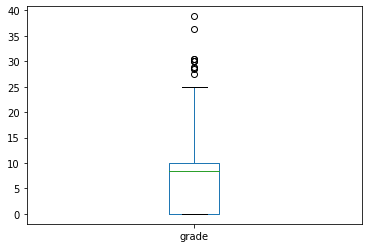

In [36]:
dflimpio[dflimpio['grade']>=-1].grade.plot(kind ="box")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A003F00910>]],
      dtype=object)

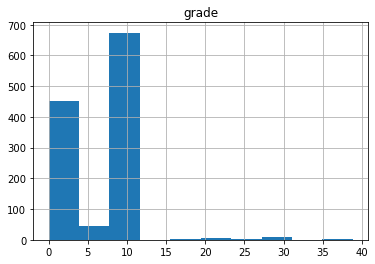

In [37]:
dflimpio.hist("grade")

In [38]:
dflimpio[["grade"]].describe()

,grade
count,1194.000000
mean,6.073735
std,5.318400
min,0.000000
25%,0.000000
50%,8.515000
75%,10.000000
max,38.850000


In [39]:
print(dflimpio.shape)

(2949, 12)


In [40]:
for a in dflimpio.index: 
    if dflimpio.loc[a,'grade']>10: 
        dflimpio.loc[a,'grade']=(dflimpio.loc[a,'grade']/10)

In [41]:
print(dflimpio.shape)

(2949, 12)


In [42]:
dflimpio.describe()

,course_id,grade,online_progress,user_id,category,hours,mdl_user_id,planta_id,language_es
count,2949.000000,1194.000000,1194.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000
mean,202.387589,5.654919,33.676127,301.842659,35.032553,13.972872,328.332316,5.007121,0.979315
std,71.567377,4.557320,45.711980,124.755485,13.658399,93.035103,124.755542,2.994616,0.142352
min,10.000000,0.000000,0.000000,3.000000,3.000000,0.000000,10.000000,1.000000,0.000000
25%,212.000000,0.000000,0.000000,224.000000,24.000000,0.000000,261.000000,5.000000,1.000000
50%,231.000000,8.330000,0.000000,355.000000,44.000000,0.000000,381.000000,5.000000,1.000000
75%,239.000000,10.000000,100.000000,396.000000,45.000000,0.000000,422.000000,5.000000,1.000000
max,306.000000,10.000000,100.000000,436.000000,45.000000,800.000000,461.000000,18.000000,1.000000


In [43]:
dflimpio1=dflimpio[dflimpio["grade"]<0].index
dflimpio2=dflimpio.drop(dflimpio1)

In [44]:
dflimpio=dflimpio2.copy()

In [45]:
dflimpio.head()

,course_id,grade,online_progress,user_id,category,hours,mdl_user_id,planta_name,1er acceso,ultimo acceso,planta_id,language_es
0,224,0.00,0.0,138,27,0,183,ABP Arrasate,"lunes, 4 de mayo de 2020, 17:04","martes, 13 de julio de 2021, 15:10",2,1
1,224,9.32,0.0,262,27,0,296,ABP Arrasate,"viernes, 18 de diciembre de 2020, 14:44","viernes, 1 de octubre de 2021, 15:56",2,1
2,224,9.66,0.0,265,27,0,299,ABP Arrasate,"viernes, 18 de diciembre de 2020, 16:18","viernes, 18 de diciembre de 2020, 17:01",2,1
3,224,NaN,NaN,263,27,0,297,ABP Arrasate,--,--,2,1
4,224,NaN,NaN,264,27,0,298,ABP Arrasate,--,--,2,1


In [46]:
dflimpio.describe()

,course_id,grade,online_progress,user_id,category,hours,mdl_user_id,planta_id,language_es
count,2949.000000,1194.000000,1194.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000
mean,202.387589,5.654919,33.676127,301.842659,35.032553,13.972872,328.332316,5.007121,0.979315
std,71.567377,4.557320,45.711980,124.755485,13.658399,93.035103,124.755542,2.994616,0.142352
min,10.000000,0.000000,0.000000,3.000000,3.000000,0.000000,10.000000,1.000000,0.000000
25%,212.000000,0.000000,0.000000,224.000000,24.000000,0.000000,261.000000,5.000000,1.000000
50%,231.000000,8.330000,0.000000,355.000000,44.000000,0.000000,381.000000,5.000000,1.000000
75%,239.000000,10.000000,100.000000,396.000000,45.000000,0.000000,422.000000,5.000000,1.000000
max,306.000000,10.000000,100.000000,436.000000,45.000000,800.000000,461.000000,18.000000,1.000000


In [47]:
dflimpio.shape

(2949, 12)

In [48]:
#Online_progress

In [49]:
dflimpio[["online_progress"]].describe()

,online_progress
count,1194.000000
mean,33.676127
std,45.711980
min,0.000000
25%,0.000000
50%,0.000000
75%,100.000000
max,100.000000


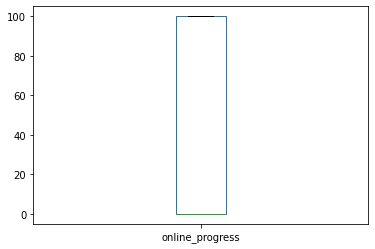

In [50]:
dflimpio[dflimpio['online_progress']>-1].online_progress.plot(kind ="box")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A003A4E880>]],
      dtype=object)

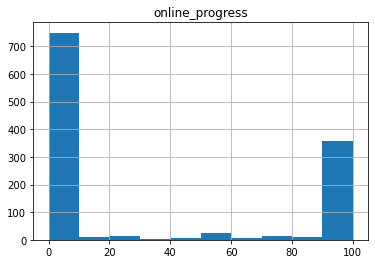

In [51]:
dflimpio.hist("online_progress")

C:\Users\Cristian\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Cristian\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


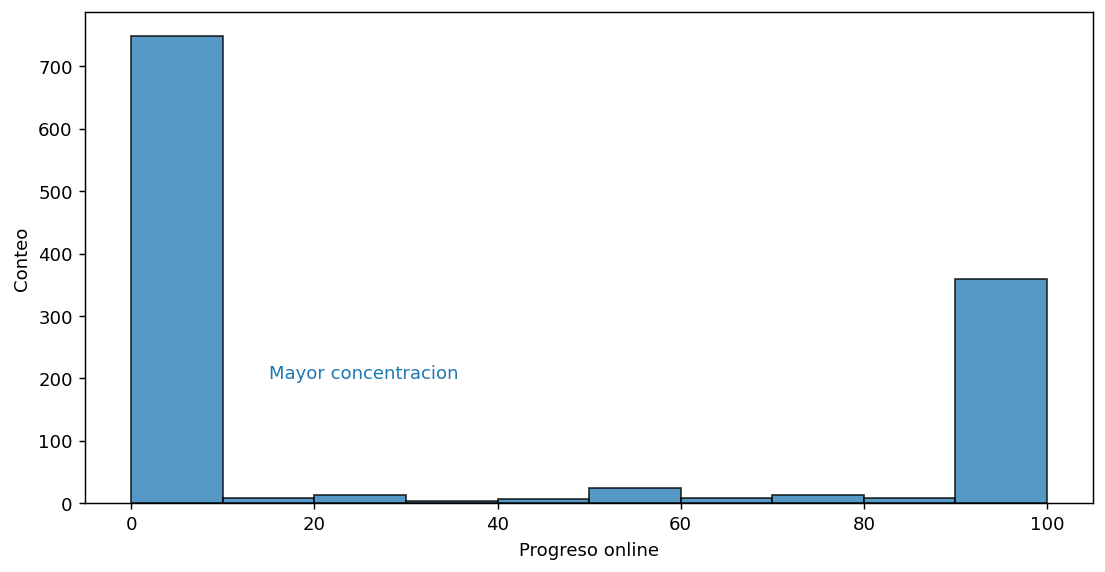

In [52]:
# Creamos los objetos figura y axe.
fig9, ax9 = plt.subplots()

# Utilizamos la funcion hist().
ax9.hist(dflimpio['online_progress'], bins = 10, alpha = 0.75, edgecolor = "black")
ax9.set(xlabel="Progreso online",ylabel="Conteo")
ax9.annotate("Mayor concentracion",xy=[15,200],color="tab:blue")
# Cambiamos el tamaño de toda la figura.
fig9.set_size_inches(10, 5)
fig9.set_dpi(130)

In [53]:
#hours

In [54]:
dflimpio[["hours"]].describe()

,hours
count,2949.000000
mean,13.972872
std,93.035103
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,800.000000


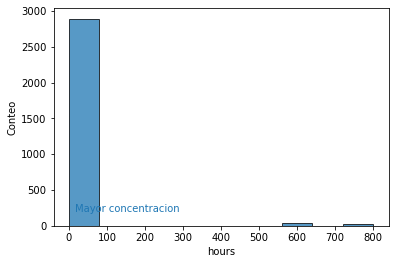

In [55]:
# Creamos los objetos figura y axe.
fig, ax = plt.subplots()

# Utilizamos la funcion hist().
ax.hist(dflimpio['hours'], bins = 10, alpha = 0.75, edgecolor = "black")
ax.set(xlabel="hours",ylabel="Conteo")
ax.annotate("Mayor concentracion",xy=[15,200],color="tab:blue")
# Cambiamos el tamaño de toda la figura.
fig9.set_size_inches(10, 5)
fig9.set_dpi(130)

In [56]:
#Los cursos con mas de 15 horas los dividimos entre 60, ya que son muchas horas y puede que esten en minutos
for a in dflimpio.index: 
    if dflimpio.loc[a,'hours']>15: 
        dflimpio.loc[a,'hours']=(dflimpio.loc[a,'hours']/60)

In [57]:
dflimpio[["hours"]].describe()

,hours
count,2949.000000
mean,0.875099
std,2.183647
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,13.333333


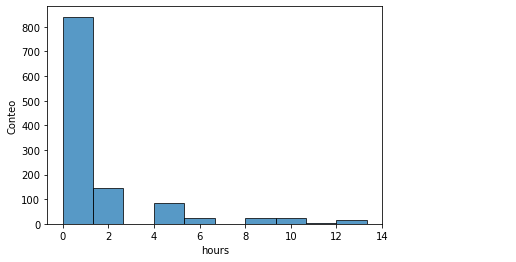

In [61]:
# Creamos los objetos figura y axe.
fig, ax = plt.subplots()

# Utilizamos la funcion hist().
ax.hist(dflimpio['hours'], bins = 10, alpha = 0.75, edgecolor = "black")
ax.set(xlabel="hours",ylabel="Conteo")
ax.annotate("Mayor concentracion",xy=[15,200],color="tab:blue")
# Cambiamos el tamaño de toda la figura.
fig9.set_size_inches(10, 5)
fig9.set_dpi(130)

In [58]:
dflimpio.isna().sum()

course_id             0
grade              1755
online_progress    1755
user_id               0
category              0
hours                 0
mdl_user_id           0
planta_name           0
1er acceso            0
ultimo acceso         0
planta_id             0
language_es           0
dtype: int64

In [59]:
dflimpio = dflimpio[dflimpio['grade'].notna()]
dflimpio = dflimpio[dflimpio['online_progress'].notna()]

In [62]:
dflimpio.isna().sum()

course_id          0
grade              0
online_progress    0
user_id            0
category           0
hours              0
mdl_user_id        0
planta_name        0
1er acceso         0
ultimo acceso      0
planta_id          0
language_es        0
dtype: int64

In [63]:
#Pasar a csv
dflimpio.to_csv("DATOS_LIMPIOS.csv")

In [64]:
dflimpio.columns

Index(['course_id', 'grade', 'online_progress', 'user_id', 'category', 'hours',
       'mdl_user_id', 'planta_name', '1er acceso', 'ultimo acceso',
       'planta_id', 'language_es'],
      dtype='object')

In [65]:
print(dflimpio.head())

   course_id  grade  online_progress  user_id  category  hours  mdl_user_id  \
0        224   0.00              0.0      138        27    0.0          183   
1        224   9.32              0.0      262        27    0.0          296   
2        224   9.66              0.0      265        27    0.0          299   
6        223   8.85              0.0      262        27    0.0          296   
7        223   9.43              0.0      265        27    0.0          299   

    planta_name                               1er acceso  \
0  ABP Arrasate          lunes, 4 de mayo de 2020, 17:04   
1  ABP Arrasate  viernes, 18 de diciembre de 2020, 14:44   
2  ABP Arrasate  viernes, 18 de diciembre de 2020, 16:18   
6  ABP Arrasate  viernes, 18 de diciembre de 2020, 14:44   
7  ABP Arrasate  viernes, 18 de diciembre de 2020, 16:18   

                             ultimo acceso  planta_id  language_es  
0       martes, 13 de julio de 2021, 15:10          2            1  
1     viernes, 1 de octubr

In [ ]:
# dflimpio['1er acceso'] = pd.to_datetime(dflimpio['1er acceso'])
# dflimpio['ultimo acceso'] = pd.to_datetime(dflimpio['ultimo acceso'])

In [ ]:
# dflimpio['ultimo acceso'][0]

In [ ]:
# print(dflimpio['1er acceso'].strftime("%Y-%m-%d"))